In [245]:
import pandas as pd
import numpy as np
import tensorflow as tf
import torch
import torch.nn as nn
import torch.nn.functional as F
#from torchvision import datasets, transforms
#from complexPyTorch.complexLayers import ComplexBatchNorm2d, ComplexConv2d, ComplexLinear
#from complexPyTorch.complexLayers import ComplexDropout2d, NaiveComplexBatchNorm2d
#from complexPyTorch.complexLayers import ComplexBatchNorm1d
#from complexPyTorch.complexFunctions import complex_relu, complex_max_pool2d

#non complex model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from scipy.signal import find_peaks, peak_widths

import cvnn.layers as complex_layers

In [2]:
data = pd.read_csv('C:/Users/alamg/Desktop/Thesis_ML/graphene/data_absorbance.csv')
data_np= np.array(data)
data_500 = pd.read_csv('C:/Users/alamg/Desktop/Thesis_ML/graphene/data_500.csv')

In [3]:
data_500_np = np.array(data_500)

In [4]:
len(data_500)

25000

In [5]:
data_abs=[]
data_s11=[]
data_param=[]
flag=0
#reshaping the data for better usebility
for j in range(0,25000,50):
    row=[]
    row2=[]
    value3= data_500_np[flag,0:3]
    data_param.append(value3)
    for i in range(0,50,1):
        value = data_500_np[flag,5]
        value2= data_500_np[flag,4]
        row.append(value)
        row2.append(value2)
        flag=flag+1
    data_abs.append(row)
    data_s11.append(row2)
   

In [98]:
data_s11=np.array(data_s11,dtype='complex64')
data_abs=np.array(data_abs,dtype='float64')
data_param=np.array(data_param,dtype='float32')

In [7]:
data_abs.

(500, 50)

In [8]:
x_freq = np.linspace(0,5,50)

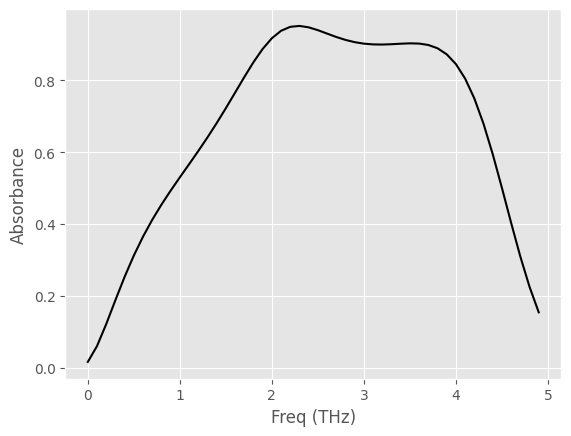

In [157]:
w1=np.arange(0,5,0.1) #plaotting original data for verification
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w1,data_abs[66,:],label='complex', color='black')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("Freq (THz)")
    plt.ylabel("Absorbance")
    plt.show()
   # plt.legend()

In [145]:
data_pk=[]
data_am=[]
data_qf=[]
pos=[]
d_m=[]
d_m2=[]

In [146]:
#getting peaks and saving discarded points
for i in range(len(data_abs)):
    peaks, _ = find_peaks(data_abs[i,:],height=0.6)
    if len(peaks)==1:
        data_pk.append(peaks)
        data_am.append(data_abs[i,(peaks)])
        j = peak_widths(data_abs[i,:], peaks, rel_height=0.5)
        data_qf.append(j[0])
        pos.append(i)
    elif len(peaks)==2:
        data_pk.append(peaks)
        data_am.append(data_abs[i,(peaks)])
        j = peak_widths(data_abs[i,:], peaks, rel_height=0.5)
        data_qf.append(j[0])
        pos.append(i)
        d_m2.append(i)
    else:
        d_m.append(i)
        

[[array([33.10130343]),
  array([29.54881949]),
  array([32.28194505]),
  array([27.27170798]),
  array([30.45010388]),
  array([25.64912696]),
  array([27.61706275]),
  array([27.55219536]),
  array([31.86667858]),
  array([30.17603481]),
  array([27.76204198]),
  array([29.10516283]),
  array([29.91307987]),
  array([30.37112352]),
  array([31.73936086]),
  array([29.96926594]),
  array([27.0576577]),
  array([28.9806594]),
  array([25.7679184]),
  array([30.43358287]),
  array([29.70461243]),
  array([29.00269679]),
  array([30.31664874]),
  array([31.8625396]),
  array([30.47794718]),
  array([28.89631238]),
  array([29.92047439]),
  array([29.72179989]),
  array([30.72815765]),
  array([31.54303241]),
  array([30.68248609]),
  array([28.11464467]),
  array([26.90989706]),
  array([28.93878859]),
  array([29.49344638]),
  array([29.43680499]),
  array([29.38719427]),
  array([30.01648308]),
  array([25.52204823]),
  array([31.74287286]),
  array([25.58130886]),
  array([28.94724985

In [147]:
discard_data = pd.DataFrame()
#getting data for each peak response by taking X as different pos values for each 1,2,3 peak response
for i in range(0,len(d_m)):
    j = d_m[i]
    k = pd.DataFrame({"B":data_param[j,0],"W":data_param[j,1],"Ef":data_param[j,2]},index=[i])
    discard_data = pd.concat([discard_data, pd.DataFrame(k)], ignore_index=True)

In [148]:
x_data = pd.DataFrame()
#getting data for each peak response by taking X as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    j = pos[i]
    k = pd.DataFrame({"B":data_param[j,0],"W":data_param[j,1],"Ef":data_param[j,2]},index=[i])
    x_data = pd.concat([x_data, pd.DataFrame(k)], ignore_index=True)


In [149]:
y_data = pd.DataFrame()
#getting data for each peak response by taking y as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    m = pd.DataFrame({"Peak":data_pk[i][0],"Amp":data_am[i][0],"Q-Factor":(data_pk[i][0]/data_qf[i][0])},index=[i])
    y_data = pd.concat([y_data, pd.DataFrame(m)], ignore_index=True)

In [150]:
y_data_abs = []
#getting data for each peak response by taking y as different pos values for each 1,2,3 peak response
for i in range(0,len(pos)):
    j=pos[i]
    y_data_abs.append(data_abs[i,:])

In [151]:
discard_data=np.array(discard_data)

In [152]:
y_data=np.array(y_data)
x_data=np.array(x_data)
y_data_abs = np.array(y_data_abs)

In [158]:
x_data.shape

(341, 3)

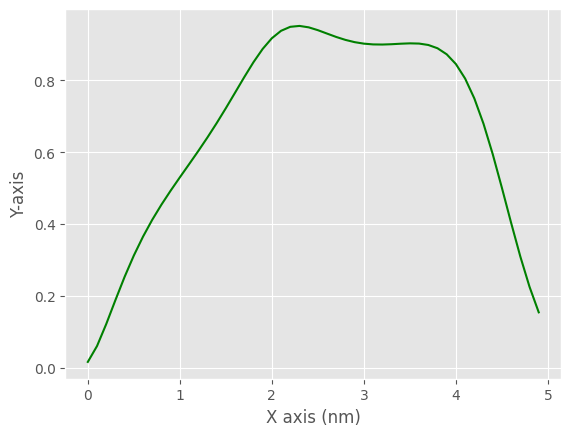

In [154]:
w1=np.arange(0,5,0.1) #plaotting original data for verification
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    plt.plot(w1,data_abs[66].T, color='green')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()
   # plt.legend()

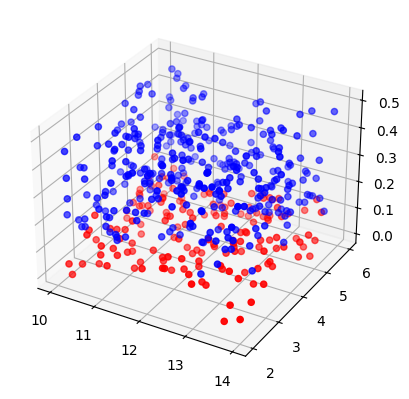

In [155]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(x_data[:,1],x_data[:,0],x_data[:,2],color='blue')
ax.scatter(discard_data[:,1],discard_data[:,0],discard_data[:,2], color ='red')
plt.show()

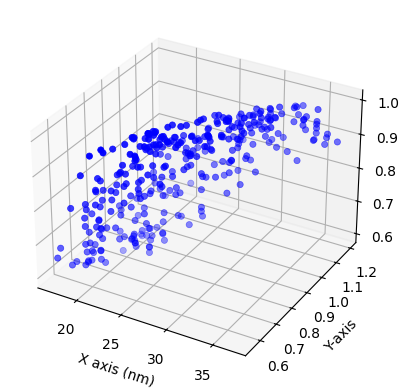

In [156]:
w2=np.arange(0,341,1) #
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    ax.scatter(y_data[:,0],y_data[:,2],y_data[:,1],color='blue')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()
   # plt.legend()

In [431]:
#Splitting data for both models 

scaler = StandardScaler()
X = scaler.fit_transform(x_data)
Y= y_data

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [454]:

# Assuming X and Y are your feature and target matrices respectively
# Split the data into training and testing sets
X_train_m1 = X_train
X_test_m1 = X_test
X_val_m1 = X_val
y_val_m1 = y_val
y_train_m1= y_train
y_test_m1=y_test

# Create a Sequential model
model_1 = Sequential()

# Add the input layer and the first hidden layer
model_1.add(Dense(360, input_shape=(3,), activation='relu'))  # Assuming 64 neurons in the first hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(30, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
#model_1.add(Dense(70, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
model_1.add(Dense(140, activation='relu'))  # Example of adding another hidden layer

# Add additional hidden layers if needed
model_1.add(Dense(70, activation='relu'))  # Example of adding another hidden layer

# Add the output layer
model_1.add(Dense(3, activation='linear'))  # Assuming 5 design parameters, using linear activation

# Compile the model
model_1.compile(optimizer='adam', loss='mse')  # Using mean squared error as the loss function

# Print a summary of the model
model_1.summary()

#Early stopping 
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

# Train the model
history = model_1.fit(X_train_m1, y_train_m1, epochs=5000, verbose=1, callbacks=[es], batch_size=32,validation_data=(X_val_m1, y_val_m1))

# Make predictions
predictions = model_1.predict(X_test_m1)  # Replace X_test with your actual test data


Model: "sequential_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_166 (Dense)           (None, 360)               1440      
                                                                 
 dense_167 (Dense)           (None, 140)               50540     
                                                                 
 dense_168 (Dense)           (None, 70)                9870      
                                                                 
 dense_169 (Dense)           (None, 3)                 213       
                                                                 
Total params: 62063 (242.43 KB)
Trainable params: 62063 (242.43 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/5000
9/9 [==============================] - 1s 19ms/step - loss: 215.1618 - val_loss: 236.7187
Epoch 2/5000
9/9 [==========================

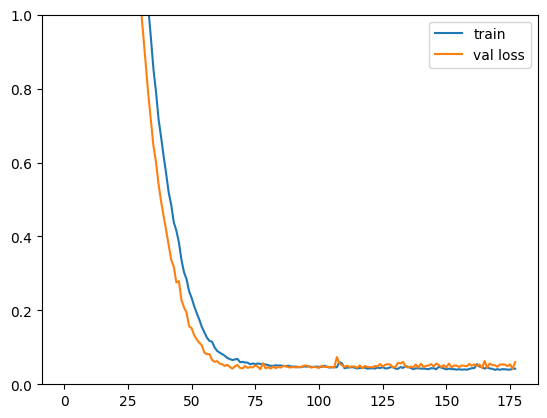

In [455]:


plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='val loss')
plt.ylim(0, 1)
plt.legend()
plt.show()

In [456]:
import joblib 

# save model with joblib 
filename = '3L_RELU_3feature_ES.sav'
joblib.dump(model_1, filename)

['3L_RELU_3feature_ES.sav']

In [457]:
# %% [markdown]
# 
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# %%

# %%
# Load CSV files


def checkpoint(model, filename):
    torch.save(model.state_dict(), filename)
    
def resume(model, filename):
    model.load_state_dict(torch.load(filename))
    
# Extract input and output data
# Convert to PyTorch tensors

#print(f"input data:{X}, output data: {y}")
X_train_m2 =  torch.tensor(X_train, dtype=torch.float32)
X_test_m2 =  torch.tensor(X_test, dtype=torch.float32)
X_val_m2 = torch.tensor(X_val, dtype=torch.float32)
y_val_m2 = torch.tensor(y_val, dtype=torch.float32)
y_train_m2= torch.tensor(y_train, dtype=torch.float32)
y_test_m2= torch.tensor(y_test, dtype=torch.float32)


# Define the neural network
class MyNeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size):
        super(MyNeuralNetwork, self).__init__()
        self.input_size = input_size
        self.hidden_layers = nn.ModuleList([
            nn.Linear(input_size, hidden_sizes[0]),
            nn.GELU()
        ])
        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.extend([
                nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]),
                nn.GELU()
            ])
        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        for layer in self.hidden_layers:
            x = layer(x)
        x = self.output_layer(x)
        return x

# Define the input, hidden, and output sizes
input_size = X.shape[1]
hidden_sizes = [360,140,70]  # Adjust the number of neurons and layers as needed
output_size = Y.shape[1]

# Create an instance of the neural network
model = MyNeuralNetwork(input_size, hidden_sizes, output_size)
print(model)
# Define loss function and optimizer
criterion = nn.MSELoss() # Mean Squared Error Loss
optimizer = optim.Adam(model.parameters(), lr=0.001) # Adaptive Moment Estimation

    
# Training loop
num_epochs = 50000

early_stop_thresh = 75
best_loss = 1000
best_epoch = 1
 
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train_m2)
    loss = criterion(outputs, y_train_m2)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    model.eval()
    
# Make predictions on new data
    with torch.no_grad():
        new_data = X_val_m2.clone().detach().requires_grad_(True)
        val_predictions  = model(new_data)

# Evaluate the model on the test set
    val_loss = criterion(val_predictions, y_val_m2)
    print(f'Validation MSE: {val_loss.item():.4f}')

    if val_loss < best_loss:
        best_loss = val_loss
        best_epoch = epoch
        checkpoint(model,"best_model.pth")
        print(f'Epoch [{epoch+1}/{num_epochs}], Training MSE: {loss.item():.4f}')
    elif epoch-best_epoch > early_stop_thresh:
        print(f'Epoch [{epoch+1}/{num_epochs}], Training MSE: {loss.item():.4f}')
        print("Early stopped training at epoch %d" % epoch)
        break  # terminate the training loop

resume(model, "best_model.pth")


# %%
with torch.no_grad():
        new_data = X_test_m2.clone().detach().requires_grad_(True)
        test_predict  = model(new_data)
# Convert predictions to numpy array if needed
predictions_m2 = test_predict.numpy()


# Evaluate the model on the test set
test_loss = criterion(test_predict, y_test_m2)
print(f'Test MSE: {test_loss.item():.4f}')
# %%






MyNeuralNetwork(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=3, out_features=360, bias=True)
    (1): GELU(approximate='none')
    (2): Linear(in_features=360, out_features=140, bias=True)
    (3): GELU(approximate='none')
    (4): Linear(in_features=140, out_features=70, bias=True)
    (5): GELU(approximate='none')
  )
  (output_layer): Linear(in_features=70, out_features=3, bias=True)
)
Validation MSE: 254.0955
Epoch [1/50000], Training MSE: 222.0405
Validation MSE: 252.7402
Epoch [2/50000], Training MSE: 220.8648
Validation MSE: 251.2049
Epoch [3/50000], Training MSE: 219.6177
Validation MSE: 249.4096
Epoch [4/50000], Training MSE: 218.2105
Validation MSE: 247.2895
Epoch [5/50000], Training MSE: 216.5699
Validation MSE: 244.7944
Epoch [6/50000], Training MSE: 214.6364
Validation MSE: 241.8852
Epoch [7/50000], Training MSE: 212.3642
Validation MSE: 238.5269
Epoch [8/50000], Training MSE: 209.7175
Validation MSE: 234.6826
Epoch [9/50000], Training MSE: 206.6639
Validati

In [436]:
Y_test.shape

(34, 3)

In [437]:
#y_test = y_test.numpy()
def nmrs (pred_np,y_tst):
    x=(abs(y_tst-pred_np)**2)/(abs(y_tst-np.mean(y_tst))**2)
    return np.mean(x)


In [411]:
n= np.mean(nmrs(predictions,Y_test))



In [458]:
# save model with joblib 
filename = '3L_GELU_3feature_ES.sav'
joblib.dump(model, filename)

['3L_GELU_3feature_ES.sav']

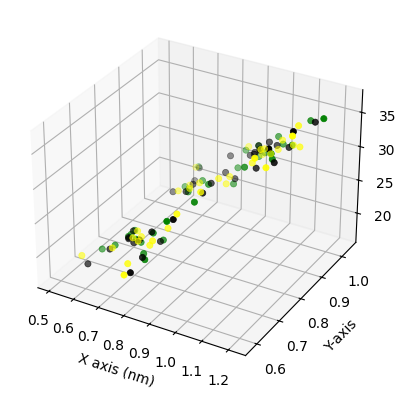

In [459]:
w2=np.arange(0,341,1) #
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
with plt.style.context('ggplot'): #sanity check if correct waveforms are loaded
    ax.scatter(y_test[:,2],y_test[:,1],y_test[:,0],color='black')
    ax.scatter(predictions_m2[:,2],predictions_m2[:,1],predictions_m2[:,0], color='yellow')
    ax.scatter(predictions[:,2],predictions[:,1],predictions[:,0], color='green')
  #  plt.plot(w1,data_abs[0,:],label='complex', color='blue')
   #plt.plot(w1,Y[1,:], label='absorbance')
#  plt.plot(w1,Y[2,:], color='green')
 #   plt.plot(w1,Y[3,:], color='blue')
  #  plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
    plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    plt.show()
   # plt.legend()

In [443]:
predictions_m2.shape

(35, 3)

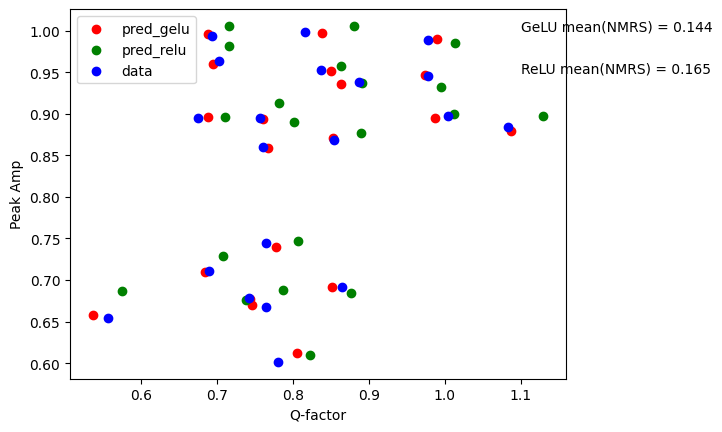

In [448]:
w1=np.arange(0,10,1)
plt.scatter(predictions_np[0:20,2],predictions_np[0:20,1],label="pred_gelu", color="red")
plt.scatter(predictions[0:20,2],predictions[0:20,1],label="pred_relu", color="green")
plt.scatter(y_test[0:20,2],y_test[0:20,1],label="data",color="blue")
#plt.annotate("ReLU r-squared = {:.3f}".format(r2_score(y_test[0:20,0], predictions[0:20,0])), (, 0.95))
#plt.annotate("GeLU r-squared = {:.3f}".format(r2_score(y_test[0:20,0], predictions_np[0:20,0])), (37, 1.00))
plt.annotate("ReLU mean(NMRS) = {:.3f}".format(nmrs(predictions[0:35,0],y_test[0:35,0])), (1.1, 0.95))
plt.annotate("GeLU mean(NMRS) = {:.3f}".format(nmrs(predictions_m2[0:35,0],y_test[0:35,0])), (1.1, 1.00))
   # plt.plot(w1,Y[2,:], color='green')
    #plt.plot(w1,Y[3,:], color='blue')
    #plt.plot(w1,Y[4,:], color='red')
    #plt.plot(w3,y_2p_wav[1,:])
plt.xlabel("Q-factor")
plt.ylabel("Peak Amp")
plt.legend(loc="upper left")
plt.show()


In [124]:
y_test.shape

torch.Size([69, 50])

In [181]:
loaded_3L = joblib.load('3L_RELU_50wav.sav')
loaded_5L = joblib.load('5L_RELU_50wav.sav')
# evaluate model 
Relu_3L = loaded_3L.predict(X_test)
Relu_5L = loaded_5L.predict(X_test)

# check results

3/3 [==============================] - 0s 4ms/step


In [319]:
from sklearn.metrics import r2_score
w1=np.arange(0,5,0.1) #plaotting original data for verification

with plt.style.context('ggplot'):#sanity check if correct waveforms are loaded
    fig, axs = plt.subplots(1, 2, figsize=(12, 5))
   # plt.subplot(1, 2, 1) 
    
    #plt.plot(w3,y_2p_wav[1,:])
   # plt.xlabel("X axis (nm)")
    plt.ylabel("Y-axis")
    
    axs[0].plot(w1,y_test[1,:].T, color='green', label='Test Data')
    axs[0].plot(w1,Relu_3L[1,:].T,label='predicted', color='blue')
    axs[0].set_title("ReLU-3L")
    axs[0].set_ylabel("Absorbance")
    axs[0].set_xlabel("Freq THz")
    axs[0].annotate("r-squared = {:.3f}".format(r2_score(y_test[1,:], Relu_3L[1,:])), (0, 0.6))
    axs[0].legend()
    
    #axs[1].subplot(1,2,2,figsize=(12, 5))
 #   axs[1].plot(w4,predictions[1,:],label='complex', color='black')
  #  axs[1].plot(w4,y_test[1,:], label='absorbance')

    axs[1].plot(w1,y_test[1,:].T, color='green', label='Test Data')
    axs[1].plot(w1,Relu_5L[1,:].T,label='predicted', color='blue')
    axs[1].set_title("GeLU-5L")
    axs[1].set_ylabel("Absorbance")
    axs[1].set_xlabel("Freq THz")
    axs[1].annotate("r-squared = {:.3f}".format(r2_score(y_test[1,:], Relu_5L[1,:])), (0, 0.8))
    axs[1].legend()
                     
    plt.tight_layout()
    plt.show()

ValueError: x and y must have same first dimension, but have shapes (50,) and torch.Size([3])

In [198]:
flag=0
flag_2=0
pos=[]
pos_2=[]
diff=[]
for i in range(len(predictions_np)):
    er_1 = r2_score(y_test[i,:].real, Relu_5L[i,:].real)
    er_2 = r2_score(y_test[i,:].real, predictions_np[i,:].real)
    if(er_1<er_2):
        flag=er_2
        pos.append(i)
        value= er_1-er_2
        diff.append(er_2-er_1)
    elif(er_1>er_2):
        flag_2=er_1
        pos_2.append(i)
        diff.append(er_2-er_1)
        

In [204]:
m=max(diff)
print(diff.index(m))

57
